In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [4]:
# train data, test data를 vectorize
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# label data를 categorical data로 변환

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
# model 구성하기
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,))) #input layer
model.add(layers.Dense(64, activation = 'relu')) #hidden layer
model.add(layers.Dense(46, activation = 'softmax')) #output layer, 결과가 여러개.

In [14]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
# Validation Data 자르기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.7811 - accuracy: 0.5134 - val_loss: 1.8585 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.5407 - accuracy: 0.6863 - val_loss: 1.3591 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.1542 - accuracy: 0.7553 - val_loss: 1.1548 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.9400 - accuracy: 0.7970 - val_loss: 1.0590 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7797 - accuracy: 0.8305 - val_loss: 0.9776 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6480 - accuracy: 0.8626 - val_loss: 1.0132 - val_accuracy: 0.7710
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5476 - accuracy: 0.8859 - val_loss: 0.9083 - val_accuracy: 0.8010
Epoch 8/20
16

In [17]:
import matplotlib.pyplot as plt

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<function matplotlib.pyplot.legend(*args, **kwargs)>

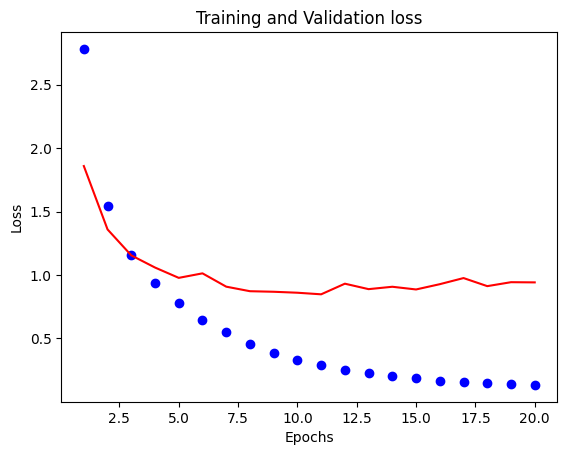

In [21]:
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

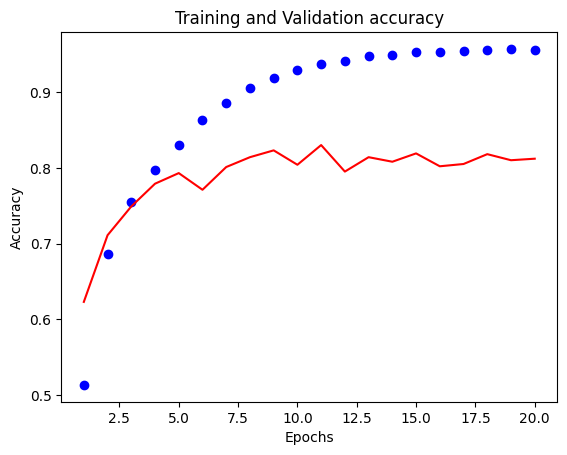

In [22]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

In [23]:
# 검증된 결과로 모델 재학습

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 11,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/11
16/16 [==============================] - 3s 63ms/step - loss: 2.9137 - accuracy: 0.4761 - val_loss: 2.0228 - val_accuracy: 0.6070
Epoch 2/11
16/16 [==============================] - 1s 37ms/step - loss: 1.6815 - accuracy: 0.6635 - val_loss: 1.4693 - val_accuracy: 0.6840
Epoch 3/11
16/16 [==============================] - 1s 33ms/step - loss: 1.2613 - accuracy: 0.7274 - val_loss: 1.2466 - val_accuracy: 0.7140
Epoch 4/11
16/16 [==============================] - 1s 32ms/step - loss: 1.0255 - accuracy: 0.7791 - val_loss: 1.1023 - val_accuracy: 0.7730
Epoch 5/11
16/16 [==============================] - 0s 31ms/step - loss: 0.8501 - accuracy: 0.8150 - val_loss: 1.0285 - val_accuracy: 0.7770
Epoch 6/11
16/16 [==============================] - 0s 31ms/step - loss: 0.7117 - accuracy: 0.8435 - val_loss: 0.9665 - val_accuracy: 0.8050
Epoch 7/11
16/16 [==============================] - 0s 31ms/step - loss: 0.5926 - accuracy: 0.8758 - val_loss: 0.9239 - val_accuracy: 0.8090
Epoch 8/11
16